In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import collections
from collections import Counter
from sklearn import preprocessing
from sklearn.cluster import KMeans,AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [2]:
def get_distances(X,model,mode='l2'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights

In [3]:
data = pd.read_csv('2ndappendedlabeled2.csv')
most_occur_id = pd.read_csv('most_occur_true.csv')
indices = np.array(most_occur_id).squeeze()
true_indices = np.array(indices).astype(str)
selected = np.array(data.loc[:,true_indices])

In [4]:
print(selected.shape)
kmeans = KMeans(n_clusters=2,random_state=0).fit(selected)
print(kmeans.labels_)
hierarchical = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(selected)
print(hierarchical.labels_)

(591, 200)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

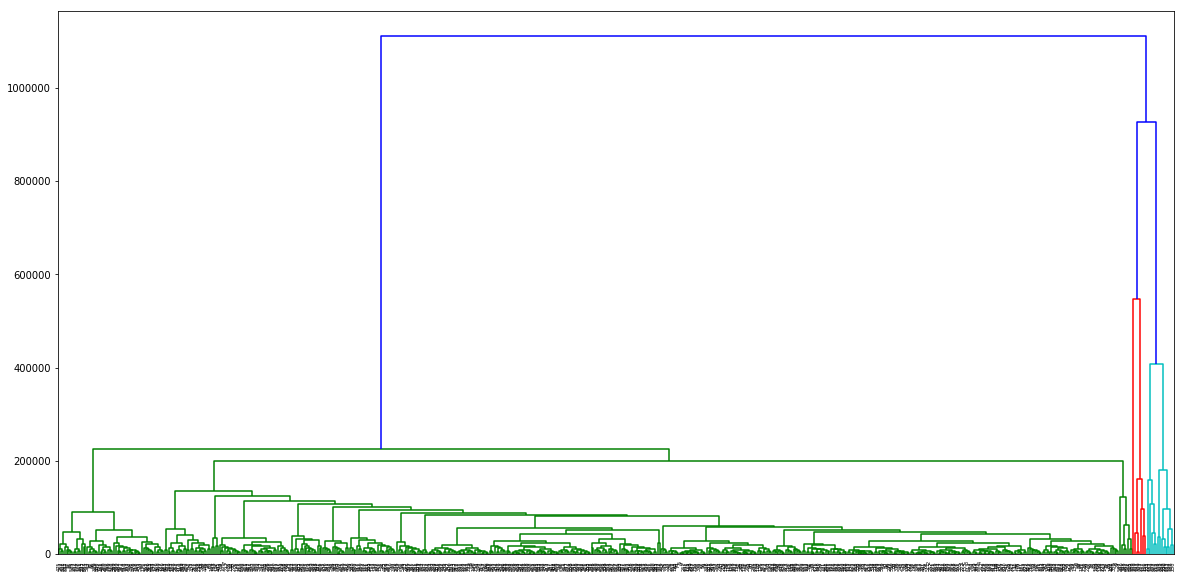

In [9]:
distance, weight = get_distances(selected,hierarchical)
linkage_matrix = np.column_stack([hierarchical.children_, distance, weight]).astype(float)
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.show()

In [5]:
true_label = np.array(data.loc[:,'labels'])
predicted_label = hierarchical.labels_
for i in range(len(predicted_label)):
    if predicted_label[i] == 0:
        predicted_label[i] = 1
    elif predicted_label[i] == 1:
        predicted_label[i] = 2
print(predicted_label)
print(true_label)
print(predicted_label == true_label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2
 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

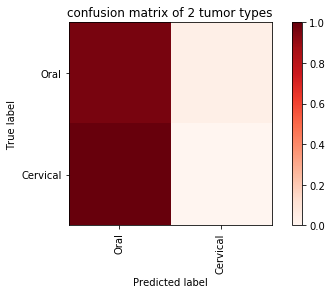

In [26]:
def draw_confusion_matrix(predicted_label_all,true_label_all):
    # predicted_label = np.array(pd.read_csv(predicted_label_path, header=None)).astype(np.int)
    # true_label = np.array(pd.read_csv(true_label_path, header=None)).astype(np.int)
    cnf_matrix = confusion_matrix(true_label_all, predicted_label_all)
    cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis]
    classes = ['Oral', 'Cervical']
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title('confusion matrix of 2 tumor types')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cnf_matrix


cnf_matrix = draw_confusion_matrix(predicted_label,true_label)
precision_s = precision_score(true_label, predicted_label, average='weighted')
recall_s = recall_score(true_label, predicted_label, average='weighted')
f1 = f1_score(true_label, predicted_label, average='weighted')
accuracy = accuracy_score(true_label, predicted_label)
accuracy_each_class = cnf_matrix.diagonal()

In [27]:
print(f1, "///", accuracy, "///", precision_s, "///", recall_s)

0.40784061910112984 /// 0.5516074450084603 /// 0.3235206295118824 /// 0.5516074450084603


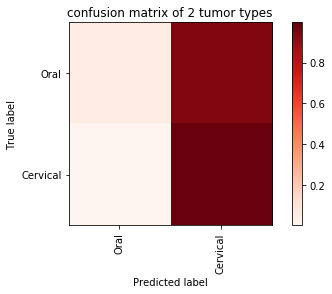

In [6]:
def draw_confusion_matrix(predicted_label_all,true_label_all):
    # predicted_label = np.array(pd.read_csv(predicted_label_path, header=None)).astype(np.int)
    # true_label = np.array(pd.read_csv(true_label_path, header=None)).astype(np.int)
    cnf_matrix = confusion_matrix(true_label_all, predicted_label_all)
    cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis]
    classes = ['Oral', 'Cervical']
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title('confusion matrix of 2 tumor types')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cnf_matrix


cnf_matrix = draw_confusion_matrix(predicted_label,true_label)
precision_s = precision_score(true_label, predicted_label, average='weighted')
recall_s = recall_score(true_label, predicted_label, average='weighted')
f1 = f1_score(true_label, predicted_label, average='weighted')
accuracy = accuracy_score(true_label, predicted_label)
accuracy_each_class = cnf_matrix.diagonal()

In [7]:
print(f1, "///", accuracy, "///", precision_s, "///", recall_s)

0.3274546617412143 /// 0.4602368866328257 /// 0.7356249640112148 /// 0.4602368866328257
